In [2]:
!pip install pandas numpy scikit-learn seaborn matplotlib

 Analysis of Purchase Data
Dimensionality: 3
Number of vectors: 10
Rank of Matrix A: 3
Cost of each product:
- Candies: ₹1.00
- Mangoes: ₹55.00
- Milk Packets: ₹18.00
Customer classifier accuracy: 66.67%
----------------------------------------

--- Analysis of Stock Data (A3) ---
Mean Price: 1560.66
Variance of Price: 58732.37
Sample Mean for Wednesdays: 1550.71
Sample Mean for April: 1698.95
Probability of making a loss: 49.80%
Conditional probability of profit on a Wednesday: 42.00%


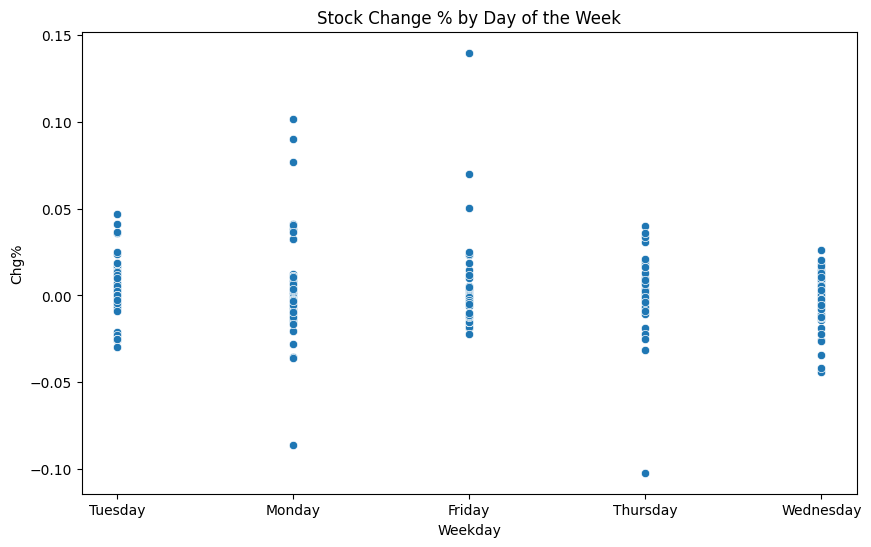

----------------------------------------

Analysis of Thyroid Data 
Thyroid data has been cleaned and prepared.
First 5 rows of cleaned data:
        age  sex  on thyroxine  query on thyroxine  on antithyroid medication  \
0  0.000824  sex           0.0                 0.0                        0.0   
1  0.000427    F           0.0                 0.0                        0.0   
2  0.000427    F           0.0                 0.0                        0.0   
3  0.000610    F           0.0                 0.0                        0.0   
4  0.000534    F           0.0                 0.0                        0.0   

   sick  pregnant  thyroid surgery  I131 treatment  query hypothyroid  ...  \
0   0.0       0.0              0.0             0.0                0.0  ...   
1   0.0       0.0              0.0             0.0                1.0  ...   
2   0.0       0.0              0.0             0.0                0.0  ...   
3   0.0       0.0              0.0             0.0         

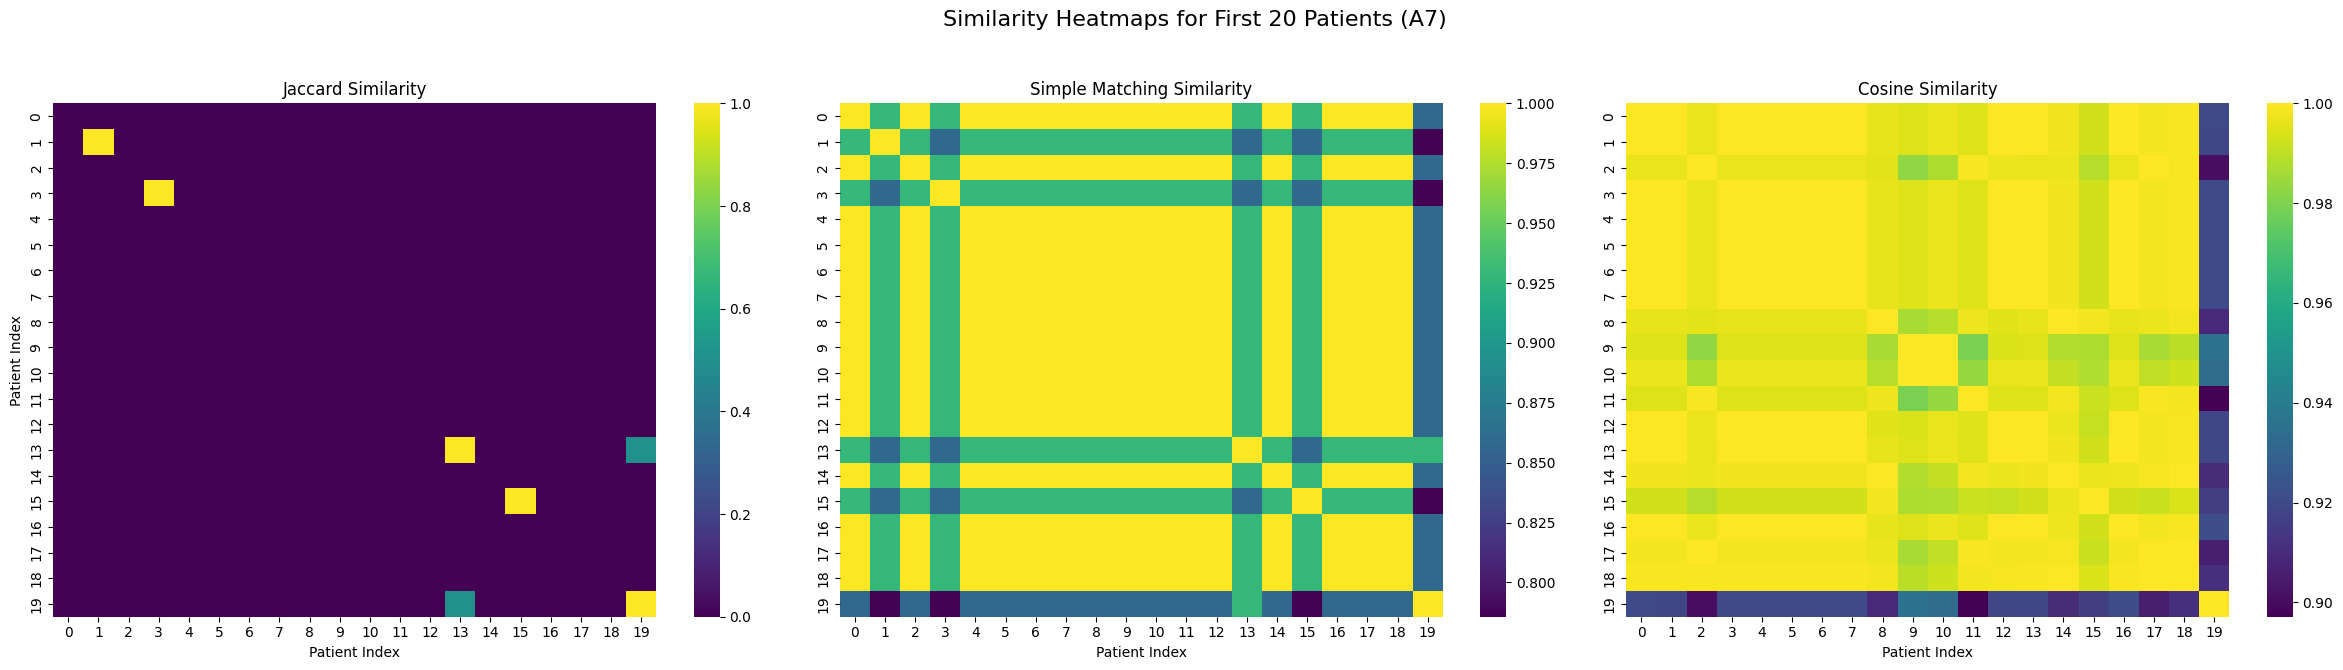

In [1]:
import pandas as pd
import numpy as np
import statistics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

#A1
def do_matrix_analysis(data_frame):

    matrix_A = data_frame.iloc[:, 1:-1].values
    matrix_C = data_frame.iloc[:, -1].values


    dimensionality = matrix_A.shape[1] #coloums
    num_vectors = matrix_A.shape[0] #rows
    rank_A = np.linalg.matrix_rank(matrix_A)


    pseu_inv_A = np.linalg.pinv(matrix_A)
    product_costs = np.dot(pseu_inv_A, matrix_C) #finds the individual cost for each item

    return dimensionality, num_vectors, rank_A, product_costs

# A2.
def classify_rich_or_poor(data_frame):

    data_frame['Category'] = np.where(data_frame.iloc[:, -1] > 200, 'RICH', 'POOR') # add new coloum category and classify rich or poor in that coloum.


    X = data_frame.iloc[:, 1:-2] #here : means select all the rows and , 1:-2 means select coloum starting from index 1 to last second coloum(but not including)
    y = data_frame['Category'] # rich or poor

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


    my_classifier = LogisticRegression()
    my_classifier.fit(X_train, y_train)

    predictions = my_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)

    return accuracy

# IRCTC stock data (A3).
def analyze_my_stocks(data_frame):

    data_frame['Date'] = pd.to_datetime(data_frame['Date'], errors='coerce')
    data_frame['Price'] = pd.to_numeric(data_frame['Price'].astype(str).str.replace(',', ''), errors='coerce')
    data_frame['Chg%'] = pd.to_numeric(data_frame['Chg%'].astype(str).str.replace('%', ''), errors='coerce') / 100.0
    data_frame.dropna(subset=['Price', 'Chg%', 'Date'], inplace=True)

    mean_price = statistics.mean(data_frame['Price'])
    variance_price = statistics.variance(data_frame['Price'])

          # data for wednesday
    data_frame['Weekday'] = data_frame['Date'].dt.day_name()
    wednesday_data = data_frame[data_frame['Weekday'] == 'Wednesday']
    wednesday_mean = statistics.mean(wednesday_data['Price'])

          # data for  April.
    april_data = data_frame[data_frame['Date'].dt.month == 4]
    april_mean = statistics.mean(april_data['Price'])


    total_days = len(data_frame)
    loss_days = len(data_frame[data_frame['Chg%'] < 0])
    profit_on_wednesday = len(wednesday_data[wednesday_data['Chg%'] > 0])  # calculates profits percentage on only wednesday

    prob_loss = loss_days / total_days
    prob_profit_wed = profit_on_wednesday / len(wednesday_data)

    return mean_price, variance_price, wednesday_mean, april_mean, prob_loss, prob_profit_wed, data_frame

#Thyroid Data
# A4, A8, A9.
def clean_thyroid_data(data_frame):

    column_names = [
        'age', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication',
        'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid',
        'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych',
        'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured',
        'T4U', 'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source', 'Class'
    ]

    data_frame.columns = ['ID'] + column_names
    data_frame.drop('ID', axis=1, inplace=True) # droped the id column


    data_frame.replace('?', np.nan, inplace=True) #replaced ? with NaN


    binary_cols = [
        'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant',
        'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid',
        'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych'
    ]
    numeric_cols = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']


    for col in numeric_cols:
        data_frame[col] = pd.to_numeric(data_frame[col], errors='coerce')
    for col in binary_cols:
        data_frame[col] = data_frame[col].map({'f': 0, 't': 1})


    data_frame.drop('TBG', axis=1, inplace=True) # dropeed TBG colum
    numeric_cols.remove('TBG')

    # Fill in the missing values (imputation).
    # For number columns, use the median. For text columns, use the mode.
    for col in data_frame.columns:
        if col in numeric_cols:
            median_val = data_frame[col].median()                  #for no columns we use median because it is less ffected by outliers (unlike mean which is affected by outliers).
            data_frame[col] = data_frame[col].fillna(median_val)
        else:
            mode_val = data_frame[col].mode()[0]                  #for text columns like yes or no (OR) T OR F we use mode because it finds the most repeated value.
            data_frame[col] = data_frame[col].fillna(mode_val)


    scaler = MinMaxScaler()
    data_frame[numeric_cols] = scaler.fit_transform(data_frame[numeric_cols])

    return data_frame, binary_cols, numeric_cols

# A5 A6
def get_similarity_scores(data_frame, binary_cols, numeric_cols):

    patient1_binary = data_frame[binary_cols].iloc[0]
    patient2_binary = data_frame[binary_cols].iloc[1]


    f11 = np.sum((patient1_binary == 1) & (patient2_binary == 1))
    f00 = np.sum((patient1_binary == 0) & (patient2_binary == 0))
    f10 = np.sum((patient1_binary == 1) & (patient2_binary == 0))
    f01 = np.sum((patient1_binary == 0) & (patient2_binary == 1))

    jaccard = f11 / (f11 + f10 + f01)
    smc = (f11 + f00) / len(binary_cols)


    patient1_numeric = data_frame[numeric_cols].iloc[0]
    patient2_numeric = data_frame[numeric_cols].iloc[1]
    cosine = np.dot(patient1_numeric, patient2_numeric) / (np.linalg.norm(patient1_numeric) * np.linalg.norm(patient2_numeric))

    return jaccard, smc, cosine

# A7
def make_heatmaps(data_frame, binary_cols, numeric_cols):

    num_patients = 20

    jc_matrix = np.zeros((num_patients, num_patients))
    smc_matrix = np.zeros((num_patients, num_patients))
    cos_matrix = np.zeros((num_patients, num_patients))


    for i in range(num_patients):
        for j in range(num_patients):

            p_i_bin = data_frame[binary_cols].iloc[i]
            p_j_bin = data_frame[binary_cols].iloc[j]
            p_i_num = data_frame[numeric_cols].iloc[i]
            p_j_num = data_frame[numeric_cols].iloc[j]


            f11 = np.sum((p_i_bin == 1) & (p_j_bin == 1))
            f00 = np.sum((p_i_bin == 0) & (p_j_bin == 0))
            f10 = np.sum((p_i_bin == 1) & (p_j_bin == 0))
            f01 = np.sum((p_i_bin == 0) & (p_j_bin == 1))


            jc_matrix[i, j] = f11 / (f11 + f10 + f01) if (f11 + f10 + f01) != 0 else 0
            smc_matrix[i, j] = (f11 + f00) / len(binary_cols) if len(binary_cols) > 0 else 0

            dot_product = np.dot(p_i_num, p_j_num)
            norm_i = np.linalg.norm(p_i_num)
            norm_j = np.linalg.norm(p_j_num)
            cos_matrix[i, j] = dot_product / (norm_i * norm_j) if (norm_i * norm_j) != 0 else 0


    fig, axes = plt.subplots(1, 3, figsize=(24, 7))
    fig.suptitle('Similarity Heatmaps for First 20 Patients (A7)', fontsize=16)


    sns.heatmap(jc_matrix, ax=axes[0], cmap='viridis', annot=False)
    axes[0].set_title('Jaccard Similarity')
    axes[0].set_xlabel('Patient Index')
    axes[0].set_ylabel('Patient Index')


    sns.heatmap(smc_matrix, ax=axes[1], cmap='viridis', annot=False)
    axes[1].set_title('Simple Matching Similarity')
    axes[1].set_xlabel('Patient Index')
    axes[1].set_ylabel('')


    sns.heatmap(cos_matrix, ax=axes[2], cmap='viridis', annot=False)
    axes[2].set_title('Cosine Similarity')
    axes[2].set_xlabel('Patient Index')
    axes[2].set_ylabel('')


    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()




purchase_df = pd.read_csv('purchase data.csv')
stock_df = pd.read_csv('IRCTC stock price.csv')
thyroid_df = pd.read_csv('thyroid0387_UCl.csv', header=None) # This one has no header



print(" Analysis of Purchase Data")
dim, n_vec, rnk, costs = do_matrix_analysis(purchase_df)
print("Dimensionality:", dim)
print("Number of vectors:", n_vec)
print("Rank of Matrix A:", rnk)
print("Cost of each product:")
print("- Candies: ₹{:.2f}".format(costs[0]))
print("- Mangoes: ₹{:.2f}".format(costs[1]))
print("- Milk Packets: ₹{:.2f}".format(costs[2]))

accuracy_result = classify_rich_or_poor(purchase_df)
print("Customer classifier accuracy:", "{:.2%}".format(accuracy_result))
print("-" * 40 + "\n")

print("--- Analysis of Stock Data (A3) ---")
mean_p, var_p, wed_mean, apr_mean, p_loss, p_profit_wed, stock_df_for_plot = analyze_my_stocks(stock_df)
print("Mean Price:", "{:.2f}".format(mean_p))
print("Variance of Price:", "{:.2f}".format(var_p))
print("Sample Mean for Wednesdays:", "{:.2f}".format(wed_mean))
print("Sample Mean for April:", "{:.2f}".format(apr_mean))
print("Probability of making a loss:", "{:.2%}".format(p_loss))
print("Conditional probability of profit on a Wednesday:", "{:.2%}".format(p_profit_wed))

plt.figure(figsize=(10, 6))
sns.scatterplot(data=stock_df_for_plot, x='Weekday', y='Chg%')
plt.title('Stock Change % by Day of the Week')
plt.show()
print("-" * 40 + "\n")


print("Analysis of Thyroid Data ")

cleaned_thyroid_df, b_cols, n_cols = clean_thyroid_data(thyroid_df)
print("Thyroid data has been cleaned and prepared.")
print("First 5 rows of cleaned data:")
print(cleaned_thyroid_df.head())
print()


j, s, c = get_similarity_scores(cleaned_thyroid_df, b_cols, n_cols)
print("Jaccard Coefficient:", "{:.4f}".format(j))
print("Simple Matching Coefficient:", "{:.4f}".format(s))
print("Cosine Similarity:", "{:.4f}".format(c))
print()


make_heatmaps(cleaned_thyroid_df, b_cols, n_cols)


